In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import svm
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pylab

In [3]:
#import data
df = pd.read_csv('hw5_treasury.csv')
#summary of data
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

Size of data 8071 x 32
        Date  SVENF01  SVENF02  SVENF03  SVENF04  SVENF05  SVENF06  SVENF07  \
0  5/17/2019   2.1224   2.0266   2.1023   2.2377   2.3790   2.5042   2.6069   
1  5/16/2019   2.1239   2.0317   2.1096   2.2468   2.3901   2.5171   2.6217   
2  5/15/2019   2.0874   1.9956   2.0844   2.2289   2.3736   2.4980   2.5984   
3  5/14/2019   2.1319   2.0559   2.1451   2.2856   2.4257   2.5461   2.6428   
4  5/13/2019   2.1051   2.0234   2.1180   2.2632   2.4051   2.5248   2.6198   

   SVENF08  SVENF09  ...  SVENF22  SVENF23  SVENF24  SVENF25  SVENF26  \
0   2.6885   2.7530  ...   3.3355   3.3876   3.4400   3.4925   3.5446   
1   2.7049   2.7710  ...   3.3574   3.4091   3.4610   3.5130   3.5646   
2   2.6779   2.7418  ...   3.3589   3.4086   3.4575   3.5055   3.5524   
3   2.7188   2.7791  ...   3.3940   3.4485   3.5029   3.5568   3.6099   
4   2.6940   2.7532  ...   3.3712   3.4227   3.4735   3.5234   3.5722   

   SVENF27  SVENF28  SVENF29  SVENF30  Adj_Close  
0   3.5962  

In [4]:
#determine how many of the columns of data are numeric versus categorical
print(df.dtypes)
i=0
j=0
for a in range(len(df.columns)):
    if(df.iloc[: ,a].dtypes == object):
        i += 1
    else:
        j += 1
print('Total number of numeric columns: ' + str(j))
print('Total number of categorical columns: ' + str(i))

Date          object
SVENF01      float64
SVENF02      float64
SVENF03      float64
SVENF04      float64
SVENF05      float64
SVENF06      float64
SVENF07      float64
SVENF08      float64
SVENF09      float64
SVENF10      float64
SVENF11      float64
SVENF12      float64
SVENF13      float64
SVENF14      float64
SVENF15      float64
SVENF16      float64
SVENF17      float64
SVENF18      float64
SVENF19      float64
SVENF20      float64
SVENF21      float64
SVENF22      float64
SVENF23      float64
SVENF24      float64
SVENF25      float64
SVENF26      float64
SVENF27      float64
SVENF28      float64
SVENF29      float64
SVENF30      float64
Adj_Close    float64
dtype: object
Total number of numeric columns: 31
Total number of categorical columns: 1


In [5]:
#splitting the target variable from the others, not including the date
X = df.iloc[:, 1:-1]
y = df.iloc[: ,-1]

In [6]:
#checking for any missing values
print(df.isnull().sum())
print("It can be seen that there are no missing values")

Date         0
SVENF01      0
SVENF02      0
SVENF03      0
SVENF04      0
SVENF05      0
SVENF06      0
SVENF07      0
SVENF08      0
SVENF09      0
SVENF10      0
SVENF11      0
SVENF12      0
SVENF13      0
SVENF14      0
SVENF15      0
SVENF16      0
SVENF17      0
SVENF18      0
SVENF19      0
SVENF20      0
SVENF21      0
SVENF22      0
SVENF23      0
SVENF24      0
SVENF25      0
SVENF26      0
SVENF27      0
SVENF28      0
SVENF29      0
SVENF30      0
Adj_Close    0
dtype: int64
It can be seen that there are no missing values


In [7]:
#printing out some statistical information of the data
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


      SVENF01  SVENF02  SVENF03  SVENF04  SVENF05  SVENF06  SVENF07  SVENF08  \
0      2.1224   2.0266   2.1023   2.2377   2.3790   2.5042   2.6069   2.6885   
1      2.1239   2.0317   2.1096   2.2468   2.3901   2.5171   2.6217   2.7049   
2      2.0874   1.9956   2.0844   2.2289   2.3736   2.4980   2.5984   2.6779   
3      2.1319   2.0559   2.1451   2.2856   2.4257   2.5461   2.6428   2.7188   
4      2.1051   2.0234   2.1180   2.2632   2.4051   2.5248   2.6198   2.6940   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8066   6.1632   6.6192   6.9560   7.2403   7.4888   7.7032   7.8831   8.0295   
8067   6.2091   6.6589   6.9843   7.2634   7.5140   7.7355   7.9250   8.0814   
8068   6.2195   6.6790   7.0240   7.3172   7.5738   7.7951   7.9805   8.1314   
8069   6.2215   6.6978   7.0637   7.3688   7.6270   7.8421   8.0168   8.1551   
8070   6.2102   6.6709   7.0310   7.3333   7.5890   7.8010   7.9722   8.1067   

      SVENF09  SVENF10  ...  SVENF22  S

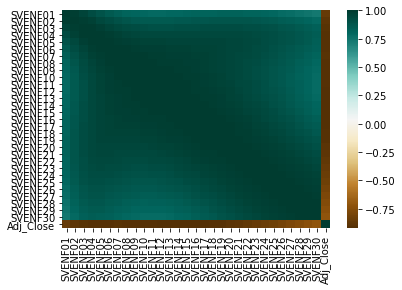

In [8]:
del df['Date']
columnsNamesArr = df.columns.values
print(df)
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm,cmap='BrBG',cbar=True,xticklabels=columnsNamesArr,yticklabels=columnsNamesArr)

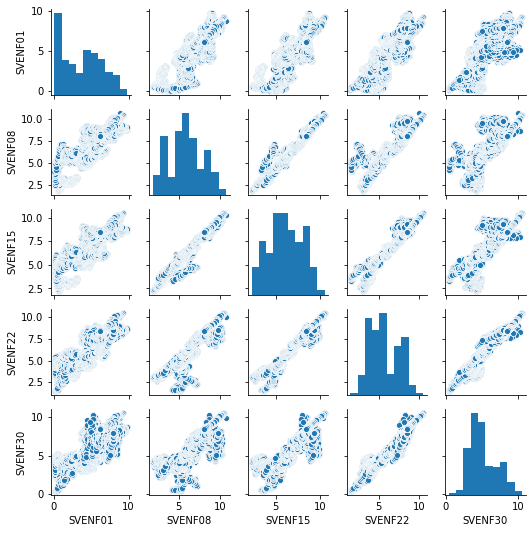

In [9]:
cols = ['SVENF01','SVENF08','SVENF15','SVENF22', 'SVENF30']

sns.pairplot(df[cols], height=1.5)
plt.tight_layout()
plt.show()

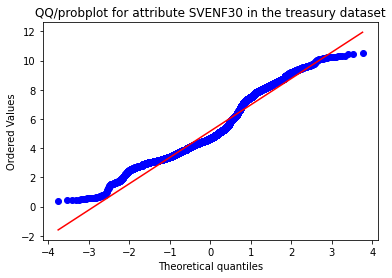

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['SVENF30'], dist="norm", plot=pylab)
ax.set_title("QQ/probplot for attribute SVENF30 in the treasury dataset")
pylab.show()

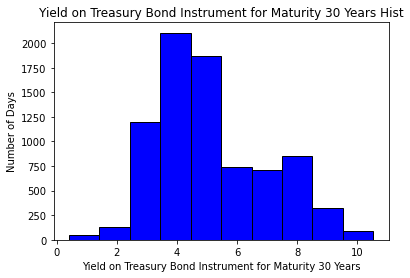

In [11]:
plt.hist(df['SVENF30'],color='blue',ec='black')
plt.title('Yield on Treasury Bond Instrument for Maturity 30 Years Hist')
plt.xlabel('Yield on Treasury Bond Instrument for Maturity 30 Years')
plt.ylabel('Number of Days')
plt.show()

In [12]:
#standardizing the data for the boxplot
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

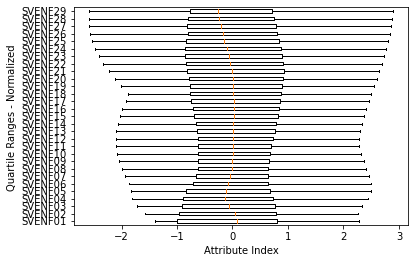

In [13]:
plt.boxplot(X_std[:,0:-1],labels=columnsNamesArr[0:-2],vert=False)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges - Normalized "))
plt.show()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [123]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
comp = pca.explained_variance_ratio_
print(comp)
print("Number of principal components: " + str(len(comp)))

[9.31796975e-01 4.07650756e-02 2.18438668e-02 4.85133058e-03
 6.63341250e-04 6.87379176e-05 9.48168675e-06 1.09876995e-06
 8.50910960e-08 6.74428451e-09 4.72621857e-10 3.80161775e-11
 9.30609065e-12 8.71811396e-12 8.59362280e-12 8.53519254e-12
 8.41818231e-12 8.32407041e-12 8.16475927e-12 8.12446450e-12
 7.94366171e-12 7.84486451e-12 7.70300119e-12 7.56475430e-12
 7.49445649e-12 7.39336209e-12 7.21415235e-12 6.93802195e-12
 6.58019099e-12 6.26023985e-12]
Number of principal components: 30


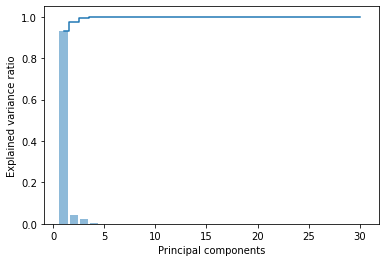

In [124]:
plt.bar(range(1, len(comp)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(comp)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [136]:
#taking only the top 3 components and running PCA again
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
comp = pca.explained_variance_ratio_
pca.components_
print(comp)
print("Number of principal components: " + str(len(comp)))

[0.93179697 0.04076508 0.02184387]
Number of principal components: 3


In [144]:
X_pca = pca.transform(X)
print("original shape: " + str(np.shape(X)))
print("transformed shape: " + str(np.shape(X_pca)))

original shape: (8071, 30)
transformed shape: (8071, 3)


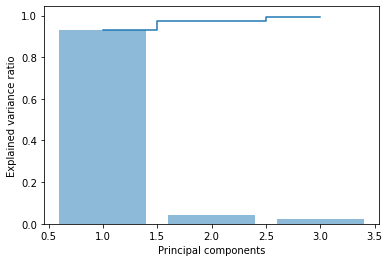

In [137]:
plt.bar(range(1, len(comp)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(comp)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [138]:
#Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
print('Slope: %.3f' % lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

Slope: -4.992
Intercept: 11.818


In [139]:
#Scores for Linear Regression all components
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904


In [140]:
#K-fold Cross Validation for Linear Regression
cv_scores = cross_val_score(lr,X,y,cv=10)
print(cv_scores)
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[ -79.77850513  -17.77026774   -4.63563564   -8.48184921   -8.49260881
   -8.89196067  -18.68028884  -79.52149639 -199.34291195 -920.84345362]
Average 10-Fold CV Score: -134.64389779935664


In [141]:
#Scores for Linear Regression 3 PC
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.820, test: 0.854
R^2 train: 0.867, test: 0.866


In [134]:
# Train a linear SVR
clf = svm.SVR(kernel="linear",gamma=.5,C=.7)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.660, test: 0.677
R^2 train: 0.893, test: 0.894


In [120]:
#K-fold Cross Validation
cv_scores = cross_val_score(clf,X,y,cv=10)
print(cv_scores)
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[  -44.36171461   -13.3821481     -5.66244843    -5.96664709
    -8.73884054    -5.59538275   -17.73968171   -85.49151149
   -99.63806805 -1046.02439772]
Average 10-Fold CV Score: -133.26008404964801


In [133]:
# Train a linear SVR with 3 PC
clf = svm.SVR(kernel="linear",gamma=.5,C=.7)
clf.fit(X_train_pca,y_train)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.849, test: 0.886
R^2 train: 0.862, test: 0.861
